# Projeto: Análises Jogada-Jogada NBB 2019

Para esse projeto estaremos analisando jogos do NBB, principal campeonato brasileiro de basquetebol. Os dados contém os seguintes campos:

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import re

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("tabela_1_Minas_x_Flamengo.csv")

In [5]:
df

,Unnamed: 0,Quarto,Tempo,Time,placar_casa,placar_visitante,Indicador,Nomes
0,0,4,00:00,NaN,85,93,fim_partida,
1,1,4,00:00,NaN,85,93,fim_quarto,NaN
2,2,4,00:01,MIN,85,93,3_Pts_T,Queirós
3,3,4,00:05,FLA,85,93,LL_Pts_C,Marquinhos
4,4,4,00:05,FLA,85,92,LL_Pts_C,Marquinhos
...,...,...,...,...,...,...,...,...
477,477,1,10:00,MIN,0,0,substituicao_entra,Leandrinho
478,478,1,10:00,MIN,0,0,substituicao_entra,Alex
479,479,1,10:00,MIN,0,0,substituicao_entra,Davi
480,480,1,10:00,MIN,0,0,substituicao_entra,Tyrone


In [6]:
# mudança do tempo
# colocar todos em segundos para facilitar a vida
# primeiro evitar NAN (acredite!!! tem isso no site)
df.dropna(subset=['Tempo'], inplace=True)

In [7]:
# tem jogos que o site apresenta numeros inteiros (1, 12, 134, 1000)
# para isso localizei o valores errados e concertei
mudar_hora = []
for x in df['Tempo']:
    if re.findall(r'..:..', x):
        mudar_hora.append(x)
    else:
        if re.findall(r'....', x):
            x = x[0:2] + ':' + x[2:4]
            mudar_hora.append(x)
        elif re.findall(r'...', x):
            x = '0' + x[0] + ':' + x[1:3]
            mudar_hora.append(x)
        elif re.findall(r'..', x):
            x = '00:' + x
            mudar_hora.append(x)
        elif re.findall(r'.', x):
            x = '00:0' + x
            mudar_hora.append(x)

df['Tempo_2'] = mudar_hora
df.drop('Tempo', axis=1, inplace=True)

In [8]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.datetime.strptime(x, '%M:%S'))

In [9]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.time(x.hour, x.minute, x.second))

In [10]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: (x.hour * 60 + x.minute) * 60 + x.second)

In [11]:
# transforma os dados para números inteiros
df['Quarto'] = df['Quarto'].apply(lambda l: int(l))

In [12]:
# modificar o tempo decrescente para crescente (* -1)
# acrescentar o tempo de cada quarto (primeiro quarto termina em 600s, o segundo quarto 2*600 = 1200 ...)
tempo_novo = []
for x, y in zip(df['Quarto'], df['Tempo_2']):
    if x == 1:
        a = (y - (600 * 1)) * -1
        tempo_novo.append(a)
    elif x == 2:
        a = (y - (600 * 2)) * -1
        tempo_novo.append(a)
    elif x == 3:
        a = (y - (600 * 3)) * -1
        tempo_novo.append(a)
    elif x == 4:
        a = (y - (600 * 4)) * -1
        tempo_novo.append(a)
    elif x == 5:
        a = (y - (600 * 5)) * -1
        tempo_novo.append(a)
    elif x == 6:
        a = (y - (600 * 6)) * -1
        tempo_novo.append(a)
    elif x == 7:
        a = (y - (600 * 7)) * -1
        tempo_novo.append(a)

df['Tempo'] = tempo_novo
df.drop('Tempo_2', axis=1, inplace=True)

In [13]:
# deixando o DataFrame nessa ordem de colunas
df = df[['Quarto', 'Tempo', 'placar_casa', 'placar_visitante', 'Time', 'Indicador', 'Nomes']]

In [14]:
df['dif_casa'] = df['placar_casa'] - df['placar_visitante']
df['dif_visitante'] = df['placar_visitante'] - df['placar_casa']

In [15]:
df

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nomes,dif_casa,dif_visitante
0,4,2400,85,93,NaN,fim_partida,,-8,8
1,4,2400,85,93,NaN,fim_quarto,NaN,-8,8
2,4,2399,85,93,MIN,3_Pts_T,Queirós,-8,8
3,4,2395,85,93,FLA,LL_Pts_C,Marquinhos,-8,8
4,4,2395,85,92,FLA,LL_Pts_C,Marquinhos,-7,7
...,...,...,...,...,...,...,...,...,...
477,1,0,0,0,MIN,substituicao_entra,Leandrinho,0,0
478,1,0,0,0,MIN,substituicao_entra,Alex,0,0
479,1,0,0,0,MIN,substituicao_entra,Davi,0,0
480,1,0,0,0,MIN,substituicao_entra,Tyrone,0,0


In [16]:
pontuacao = df[(df['Indicador'] == '3_Pts_C') | (df['Indicador'] == '3_Pts_T') | 
               (df['Indicador'] == '2_Pts_C') | (df['Indicador'] == '2_Pts_C') |
               (df['Indicador'] == 'LL_Pts_C') | (df['Indicador'] == 'LL_Pts_C')]

In [17]:
pontuacao

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nomes,dif_casa,dif_visitante
2,4,2399,85,93,MIN,3_Pts_T,Queirós,-8,8
3,4,2395,85,93,FLA,LL_Pts_C,Marquinhos,-8,8
4,4,2395,85,92,FLA,LL_Pts_C,Marquinhos,-7,7
12,4,2381,85,91,MIN,3_Pts_T,Alex,-6,6
18,4,2376,85,91,FLA,LL_Pts_C,Mineiro,-6,6
...,...,...,...,...,...,...,...,...,...
455,1,114,1,5,MIN,LL_Pts_C,Scott,-4,4
458,1,100,0,5,FLA,3_Pts_C,Zach Graham,-5,5
464,1,62,0,2,FLA,2_Pts_C,Olivinha,-2,2
466,1,47,0,0,MIN,3_Pts_T,Davi,0,0


In [18]:
# pontuacao.to_csv('tempo2.csv')

In [19]:
# a.set_index("Tempo", inplace=True)

In [20]:
# a[['placar_casa', 'placar_visitante']].plot()

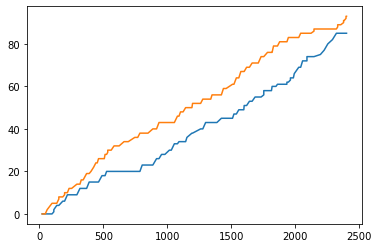

In [21]:
# plt.figure(figsize=(100,10))
fig, ax = plt.subplots()
x = pontuacao['Tempo']
y = pontuacao[['placar_casa', 'placar_visitante']]
ax.plot(x, y)

# tentar colocar uma minha vermelha entre os quartos, para separar visualmente 
#threshold = 1800
#ax.fill_between(0, 1, where=y > threshold,
#                color='green', alpha=0.5, transform=ax.get_xaxis_transform())

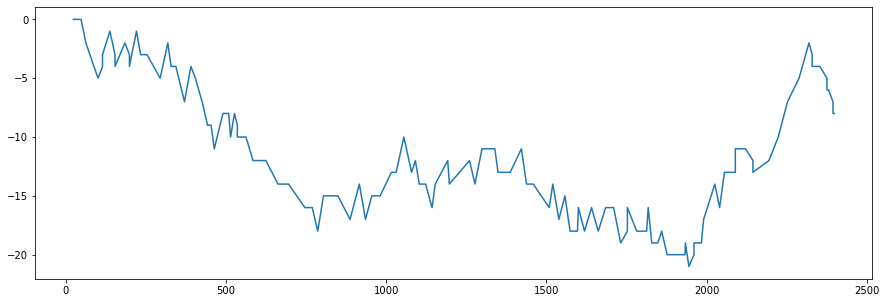

In [22]:
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['dif_casa'])

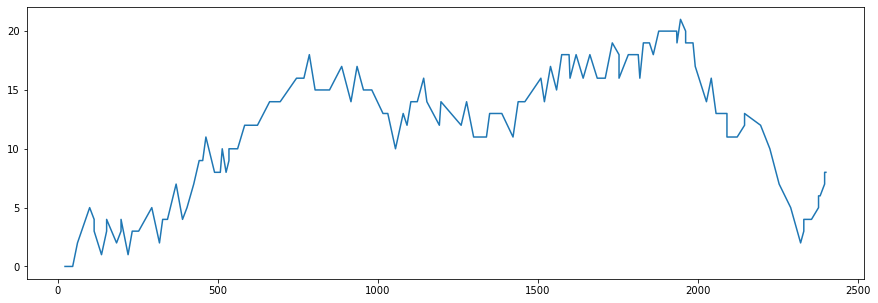

In [23]:
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['dif_visitante'])

In [24]:
posse_bola = df[(df['Indicador'] == '3_Pts_C') | (df['Indicador'] == '3_Pts_T') | 
                (df['Indicador'] == '2_Pts_C') | (df['Indicador'] == '2_Pts_C') |
                (df['Indicador'] == 'LL_Pts_C') | (df['Indicador'] == 'LL_Pts_C') |
                (df['Indicador'] == 'ER') | (df['Indicador'] == 'tempo_tecnico') |
                (df['Indicador'] == 'fim_partida') | (df['Indicador'] == 'fim_quarto') |
                (df['Indicador'] == 'inicio_partida') | (df['Indicador'] == 'inicio_quarto') |
                (df['Indicador'] == 'tempo_tecnico')]

In [25]:
posse_bola["diferenca"] = posse_bola["Tempo"].diff(-1)

<ipython-input-25-9d871266beab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posse_bola["diferenca"] = posse_bola["Tempo"].diff(-1)


In [26]:
posse_bola.to_csv('tempo2.csv')

In [27]:
filtro = (posse_bola['diferenca'] >= 1) | (posse_bola['Indicador'] == 'inicio_partida') | (posse_bola['Indicador'] == 'fim_quarto')
valor_posse_bola = posse_bola[filtro]

In [28]:
valor_posse_bola

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nomes,dif_casa,dif_visitante,diferenca
1,4,2400,85,93,NaN,fim_quarto,NaN,-8,8,1.0
2,4,2399,85,93,MIN,3_Pts_T,Queirós,-8,8,4.0
4,4,2395,85,92,FLA,LL_Pts_C,Marquinhos,-7,7,14.0
12,4,2381,85,91,MIN,3_Pts_T,Alex,-6,6,5.0
19,4,2376,85,90,FLA,LL_Pts_C,Mineiro,-5,5,22.0
...,...,...,...,...,...,...,...,...,...,...
458,1,100,0,5,FLA,3_Pts_C,Zach Graham,-5,5,38.0
464,1,62,0,2,FLA,2_Pts_C,Olivinha,-2,2,15.0
466,1,47,0,0,MIN,3_Pts_T,Davi,0,0,24.0
470,1,23,0,0,FLA,3_Pts_T,Marquinhos,0,0,23.0


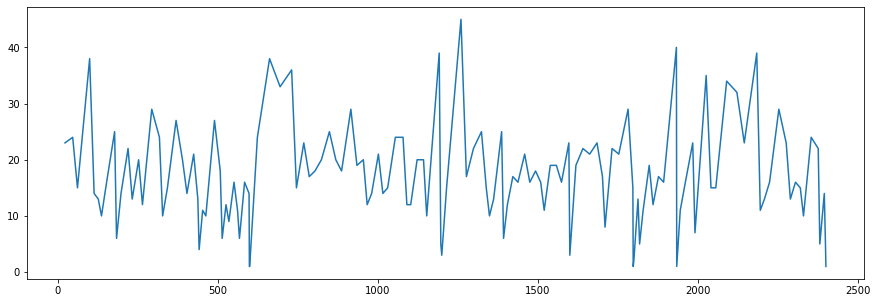

In [29]:
plt.figure(figsize=(15,5))
plt.plot(valor_posse_bola['Tempo'], valor_posse_bola['diferenca'])